In [2]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime
from array import array  # Correct import for the array

from MyCommonAnalysisFunction_richcap import *

import math
import array
import copy

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

print(color.BOLD, "\nStarting RG-A SIDIS Analysis\n", color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

 
Starting RG-A SIDIS Analysis
 

Started running on 11-3-2024 at 5:52 p.m.



# Creating Shaded Sector-dependent Fit Parameter Plots

In [ ]:
# Define 'Text_output' below using the text output of the 'Compare Dimensions/Sectors' cell in the 'Fit_Parameter_Comparison.ipynb' notebook (same one that is meant to fill the excel sheets)
    # The output of this cell should then be pasted into the next cell below
Text_output = '''
Bin 1-1 ;Parameter B ;-0.058752781 ; 0.019127163 ;-0.212546804 ; 0.155868053 ;-0.169418651 ; 0.121191863 ;-0.091496963 ; 0.068387564 ;-0.117237326 ; 0.028988017 ;0.05723985 ; 0.039475493 ;-0.121147324 ; 0.045959439 
Bin 1-1 ;Parameter C ;0.017620822 ; 0.013155325 ;-0.061380736 ; 0.042812797 ;-0.003882208 ; 0.002770609 ;-0.041247181 ; 0.029207178 ;0.035458765 ; 0.018439099 ;0.048586227 ; 0.036422145 ;-0.014648136 ; 0.010637682 
Bin 1-2 ;Parameter B ;-0.097067744 ; 0.020698183 ;0.009885234 ; 0.006584157 ;-0.282387185 ; 0.074081404 ;-0.125982251 ; 0.052292675 ;-0.116290925 ; 0.048636431 ;-0.046254848 ; 0.02950976 ;-0.054478376 ; 0.0388736 
Bin 1-2 ;Parameter C ;0.02848994 ; 0.010621323 ;0.042141982 ; 0.02918433 ;-0.046463712 ; 0.034501585 ;0.013399523 ; 0.009559875 ;0.056373821 ; 0.041158062 ;0.029163523 ; 0.020134124 ;0.035835119 ; 0.026629156 
Bin 1-3 ;Parameter B ;-0.114389442 ; 0.061527809 ;-0.251470407 ; 0.080931859 ;-0.098992076 ; 0.072539214 ;-0.264717594 ; 0.061452445 ;-0.233102827 ; 0.043140483 ;-0.135398741 ; 0.040221428 ;-0.020895641 ; 0.013886677 
Bin 1-3 ;Parameter C ;0.017407547 ; 0.022415606 ;-0.075705355 ; 0.05611067 ;0.046918373 ; 0.035005897 ;-0.132237596 ; 0.036482578 ;-0.001998909 ; 0.001442284 ;0.001782413 ; 0.001321057 ;0.064720244 ; 0.022436429 
Bin 1-4 ;Parameter B ;-0.217837284 ; 0.008130016 ;-0.220424384 ; 0.049712518 ;-0.308697742 ; 0.024876074 ;-0.146748249 ; 0.023741491 ;-0.253026642 ; 0.023694547 ;-0.214389714 ; 0.032679306 ;-0.213223635 ; 0.022883026 
Bin 12-14 ;Parameter C ;-0.010000001 ; 0.001327181 ;-0.020766412 ; 0.011375749 ;-0.010000031 ; 0.019711971 ;-0.010000224 ; 0.013064568 ;-0.010000002 ; 0.004229693 ;-0.038061207 ; 0.024714622 ;-0.010000001 ; 0.013686061 
'''

# Split the text into lines
lines = Text_output.strip().splitlines()

# Dictionary to store parsed results
Fit_Parameters = {}

for line in lines:
    if(line.strip()):  # Only process non-empty lines
        parts = line.split(';')
        
        # Extract dictionary key from the first two parts
        key = f'({parts[0].strip()})_({parts[1].strip()})'
        
        # Extract and group the remaining numbers
        values = [float(x.strip()) for x in parts[2:]]
        grouped_values = [[values[i], values[i+1]] for i in range(0, len(values), 2)]
        
        # Assign to dictionary
        Fit_Parameters[key] = grouped_values

# Define a function to format the lists with aligned numbers
def format_fit_parameters(fit_params):
    output = []
    for key, value in fit_params.items():
        # Format each number with a width of 12 characters, aligned with 9 decimal places
        formatted_values = ', '.join(
            f"[{num[0]:>12.9f}, {num[1]:>12.9f}]" for num in value
        )
        # Format the entire line
        output.append("".join([f'Fit_Parameters["{key}"]'.ljust(43), f' = [{formatted_values}]']))
    return '\n'.join(output)

# Generate and print the formatted output
print(format_fit_parameters(Fit_Parameters))


Did NOT save: Sector_Dependence_Plot_Q2_y_Bin_5_CosPhi.pdf


Did NOT save: Sector_Dependence_Plot_Q2_y_Bin_5_Cos2Phi.pdf

Done


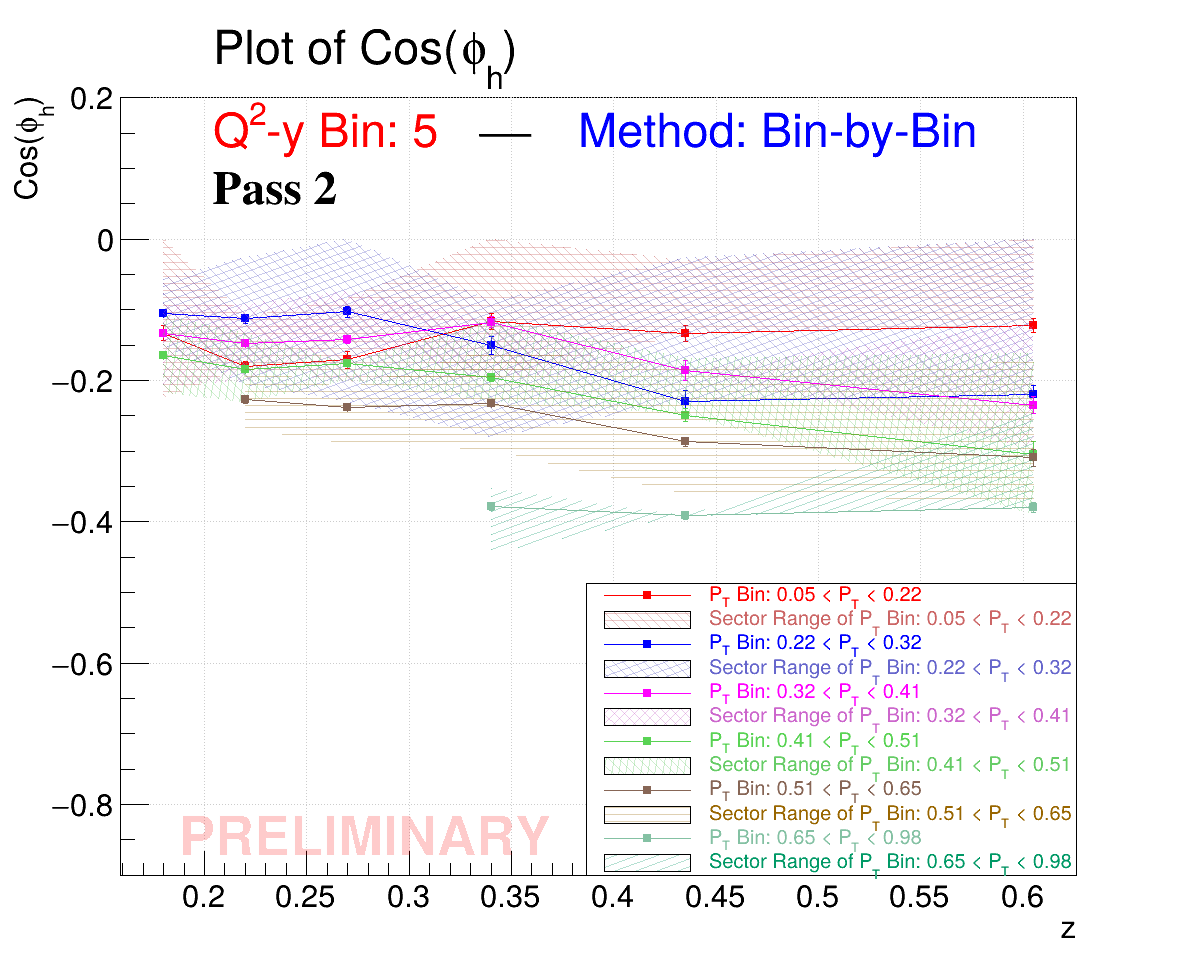

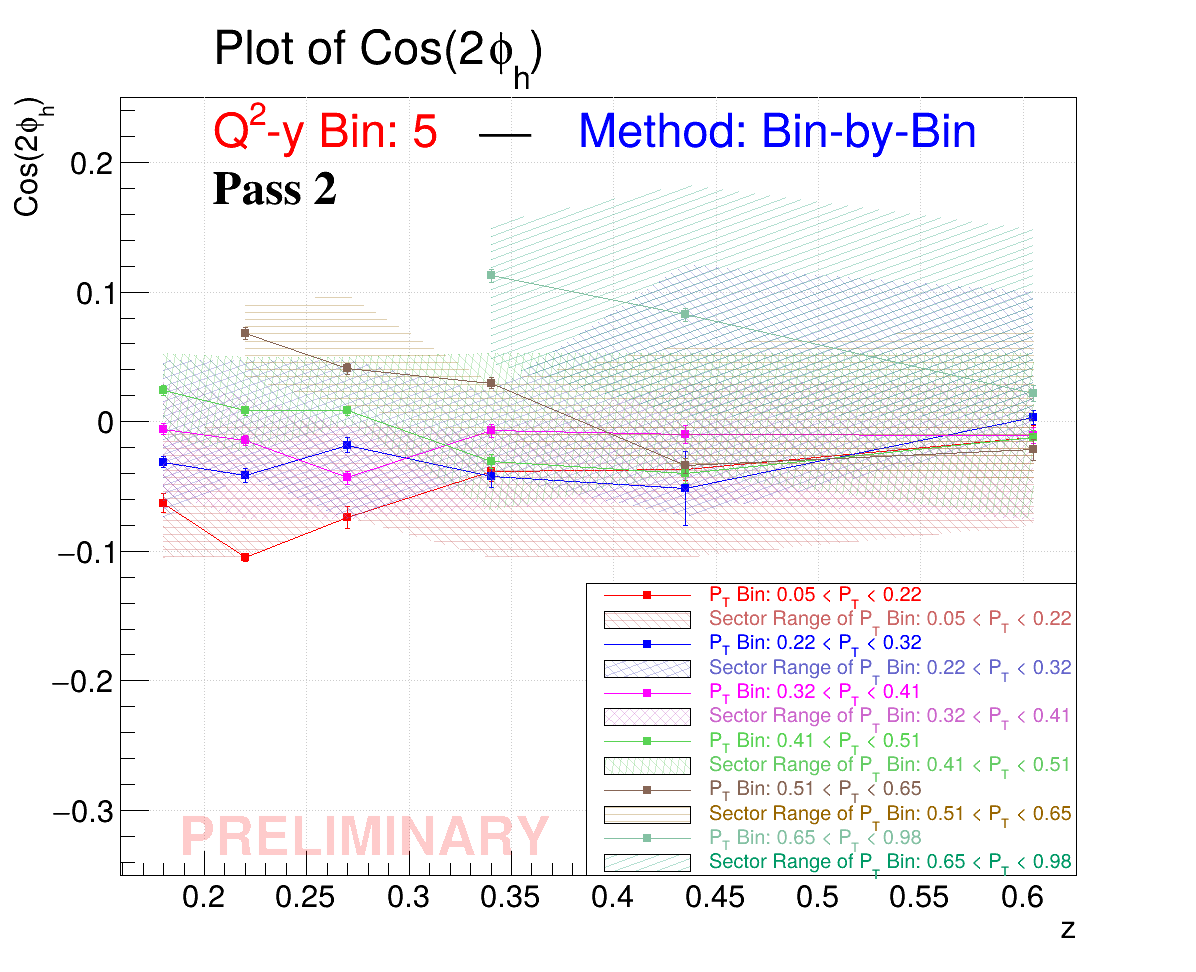

In [3]:
import ROOT
from array import array
Fit_Parameters = {}   
Fit_Parameters["(Bin 5-1)_(Parameter B)"]  = [[-0.122784766, 0.009950215], [-2.60E-07,    2.70E-07],    [-0.110385127, 0.08232764],  [-0.093859625, 0.070064939], [-0.108249186, 0.044048136], [-0.096732917, 0.046540774], [-0.119436407, 0.089505951]]
Fit_Parameters["(Bin 5-1)_(Parameter C)"]  = [[-0.012358374, 9.21E-03],    [-4.00E-09,    8.00E-09],    [-2.83E-12,    5.30E-12],    [-4.57E-10,    7.88E-10],    [-5.12E-12,    3.75E-12],    [-0.080688188, 0.03600326],  [-0.002899628, 0.001882553]]
Fit_Parameters["(Bin 5-2)_(Parameter B)"]  = [[-0.2194483,   0.012115446], [-0.273008572, 0.110805588], [-0.221884609, 0.073682438], [-2.00E-09,    4.00E-09],    [-0.043575304, 0.024767655], [-0.257770229, 0.121037138], [-0.148636568, 0.102103675]]
Fit_Parameters["(Bin 5-2)_(Parameter C)"]  = [[0.00322851,   0.005097444], [-0.013002136, 0.008282393], [-0.011112363, 0.007406839], [0.100107083,  0.037191121], [0.092822785,  0.069322745], [0.02529296,   0.036293506], [0.055168595,  0.032351863]]
Fit_Parameters["(Bin 5-3)_(Parameter B)"]  = [[-0.234731622, 0.011753168], [-0.221651425, 0.061602855], [-0.29561155,  0.061433243], [-0.118579658, 0.101452058], [-0.281086368, 0.066541626], [-0.229024219, 0.154221931], [-0.169299309, 0.072285653]]
Fit_Parameters["(Bin 5-3)_(Parameter C)"]  = [[-0.010763847, 0.006179969], [-0.074999999, 0.045434704], [-0.019048898, 0.012656183], [0.029999999,  0.019491084], [0.029999999,  0.019330631], [-0.026163562, 0.012658678], [0.029999989,  0.018105958]]
Fit_Parameters["(Bin 5-4)_(Parameter B)"]  = [[-0.304084241, 0.017112764], [-0.344555899, 0.05764255],  [-0.39000778,  0.087570473], [-0.340380436, 0.078628067], [-0.313124546, 0.212872105], [-0.161805158, 0.075166423], [-0.327999056, 0.071595151]]
Fit_Parameters["(Bin 5-4)_(Parameter C)"]  = [[-0.012260963, 0.005842549], [-0.075,       0.041854697], [0.025550662,  0.018928736], [0.010573364,  0.016081971], [-0.031011723, 0.021186157], [0.052499989,  0.033100717], [-0.038159372, 0.019246041]]
Fit_Parameters["(Bin 5-5)_(Parameter B)"]  = [[-0.309180457, 0.012067257], [-0.173967263, 0.07652863],  [-0.372261101, 0.053041783], [-0.24837014,  0.056128401], [-0.294088251, 0.081878746], [-0.263773225, 0.079095915], [-0.276946038, 0.073890208]]
Fit_Parameters["(Bin 5-5)_(Parameter C)"]  = [[-0.02177138,  0.008212516], [-0.038942669, 0.022394058], [0.003513285,  0.004960157], [-0.044999996, 0.029876289], [0.004477558,  0.002732896], [0.072831949,  0.054509847], [-0.006454868, 0.003683472]]
Fit_Parameters["(Bin 5-6)_(Parameter B)"]  = [[-0.379373371, 0.007159575], [-0.34371824,  0.046989946], [-0.240979766, 0.055014961], [-0.297051753, 0.05223815],  [-0.382200767, 0.056130947], [-0.333833133, 0.046133262], [-0.320153061, 0.058418096]]
Fit_Parameters["(Bin 5-6)_(Parameter C)"]  = [[0.022039542,  0.006232225], [0.005000001,  0.00725154],  [0.148582056,  0.04204928],  [0.069843692,  0.051641369], [0.041970357,  0.027938462], [0.005,        0.008281613], [0.049652298,  0.035337232]]
Fit_Parameters["(Bin 5-7)_(Parameter B)"]  = [[-0.133947294, 0.011158058], [-0.029963626, 0.019118999], [-0.092087112, 0.067373519], [-0.102292738, 0.073052193], [-0.149193406, 0.097204492], [-0.136716063, 0.112149636], [-0.112080498, 0.046659933]]
Fit_Parameters["(Bin 5-7)_(Parameter C)"]  = [[-0.036703672, 0.008426144], [-0.050159439, 0.0330332],   [-5.08E-12,    6.67E-12],    [-1.33E-11,    2.13E-11],    [-0.104787087, 0.069186992], [-0.03988112,  0.062066254], [-1.30E-11,    1.39E-11]]
Fit_Parameters["(Bin 5-8)_(Parameter B)"]  = [[-0.230389062, 0.015756777], [-0.195007106, 0.11373011],  [-0.197351003, 0.080501149], [-0.05521464,  0.040161138], [-0.245665354, 0.050362253], [-0.026671853, 0.036841195], [-0.246200875, 0.051318977]]
Fit_Parameters["(Bin 5-8)_(Parameter C)"]  = [[-0.051500374, 0.028342923], [-0.073072012, 0.02577663],  [-0.052771964, 0.028861507], [-0.019222545, 0.014399353], [-0.061480208, 0.039060647], [0.120801,     0.030996583], [-0.004517395, 0.001521867]]
Fit_Parameters["(Bin 5-9)_(Parameter B)"]  = [[-0.186377302, 0.014109241], [-0.248720058, 0.079834274], [-0.169220613, 0.12111708],  [-0.219352272, 0.053647753], [-0.129874248, 0.096549316], [-0.168364037, 0.052218401], [-0.158725729, 0.065666228]]
Fit_Parameters["(Bin 5-9)_(Parameter C)"]  = [[-0.009922203, 0.007229192], [-6.06E-02,    4.15E-02],    [-0.031810608, 0.021212077], [0.029999945,  0.019991434], [-0.019977563, 0.010263169], [0.03,         0.015502702], [0.021121142,  0.012888739]]
Fit_Parameters["(Bin 5-10)_(Parameter B)"] = [[-0.249028999, 0.009424743], [-0.168982134, 0.061178731], [-0.20090516,  0.046584174], [-0.276044312, 0.065567889], [-0.258925593, 0.047684522], [-0.243782771, 0.064520364], [-0.199594319, 0.060883046]]
Fit_Parameters["(Bin 5-10)_(Parameter C)"] = [[-0.040305639, 0.007606523], [-0.037084393, 0.04310831],  [0.052499999,  0.034970642], [-0.063068175, 0.030890182], [-0.024999975, 0.048666521], [-0.041134284, 0.040866936], [-0.028382132, 0.035126953]]
Fit_Parameters["(Bin 5-11)_(Parameter B)"] = [[-0.286641831, 0.006630969], [-0.179874303, 0.039957882], [-0.287997039, 0.036619173], [-0.20655492,  0.040978063], [-0.361036709, 0.041633778], [-0.242779977, 0.043274844], [-0.297327048, 0.041487893]]
Fit_Parameters["(Bin 5-11)_(Parameter C)"] = [[-0.03410467,  0.006023571], [0.001565954,  0.000971727], [-0.044999999, 0.024800104], [0.060009006,  0.04461985],  [-0.032732126, 0.01837285],  [-0.0261102,   0.013165136], [-0.034356455, 0.018369571]]
Fit_Parameters["(Bin 5-12)_(Parameter B)"] = [[-0.391475615, 0.005311826], [-0.373245479, 0.029339482], [-0.391272844, 0.035858505], [-0.371340608, 0.033083393], [-0.375515586, 0.033595996], [-0.408487323, 0.031444083], [-0.393505052, 0.03249088]]
Fit_Parameters["(Bin 5-12)_(Parameter C)"] = [[0.082336425,  0.005161721], [0.005000003,  0.005330585], [0.182595663,  0.031462405], [0.048453147,  0.036197731], [0.078277308,  0.028798073], [0.057125663,  0.041390347], [0.106527222,  0.029829971]]
Fit_Parameters["(Bin 5-13)_(Parameter B)"] = [[-0.116755884, 0.011567395], [-6.00E-09,    1.20E-08],    [-0.140529641, 0.105221319], [-0.165052937, 0.102938751], [-0.149163932, 0.110848164], [-0.139981938, 0.101632385], [-0.198326823, 0.041257595]]
Fit_Parameters["(Bin 5-13)_(Parameter C)"] = [[-0.038135784, 0.008268323], [-0.047906685, 0.035372244], [-0.006894508, 0.003856629], [-0.049669742, 0.026824307], [-0.044633516, 0.02427437],  [-0.060491458, 0.04474814],  [-0.104999963, 0.052484607]]
Fit_Parameters["(Bin 5-14)_(Parameter B)"] = [[-0.150423578, 0.01302987],  [-0.094854263, 0.063586065], [-0.279838388, 0.045215518], [-0.087485454, 0.056109375], [-0.203921196, 0.047165337], [-0.201506699, 0.050161018], [-0.153880435, 0.114715645]]
Fit_Parameters["(Bin 5-14)_(Parameter C)"] = [[-0.042025616, 0.008615293], [-0.066715008, 0.045740716], [0.022929699,  0.035674271], [-0.026650129, 0.019731784], [-0.074999998, 0.045180593], [-0.074999997, 0.04695479],  [-0.024985283, 0.017648854]]
Fit_Parameters["(Bin 5-15)_(Parameter B)"] = [[-0.117548956, 0.008081244], [-0.154646738, 0.058093319], [-0.127742633, 0.039925851], [-0.161999321, 0.041145663], [-0.152013272, 0.055163224], [-0.193612449, 0.052987098], [-0.091227069, 0.035592756]]
Fit_Parameters["(Bin 5-15)_(Parameter C)"] = [[-0.007083038, 0.005231802], [-0.040177781, 0.042310273], [-0.003348423, 0.006452759], [-0.024999997, 0.035707528], [-0.036473679, 0.04414678],  [-0.066487057, 0.033452493], [-0.00378229,  0.006217353]]
Fit_Parameters["(Bin 5-16)_(Parameter B)"] = [[-0.196325842, 0.005753685], [-0.112389297, 0.035916794], [-0.165810776, 0.032811634], [-0.198804297, 0.036204591], [-0.145661209, 0.03969091],  [-0.230208316, 0.035317671], [-0.191947555, 0.035919613]]
Fit_Parameters["(Bin 5-16)_(Parameter C)"] = [[-0.030610191, 5.35E-03],    [0.005786884,  0.003451237], [0.052499986,  0.023604104], [-0.038217422, 0.028070091], [-0.01080198,  0.006821966], [-0.043303637, 0.032463255], [-0.069312437, 0.035651712]]
Fit_Parameters["(Bin 5-17)_(Parameter B)"] = [[-0.232891417, 0.004581572], [-0.182435618, 0.027641276], [-0.262703184, 0.02820838],  [-0.208338226, 0.026611986], [-0.292807252, 0.026537101], [-0.298241711, 0.025982835], [-0.155301984, 0.028480178]]
Fit_Parameters["(Bin 5-17)_(Parameter C)"] = [[0.029695396,  0.00445177],  [0.052178938,  0.03728156],  [0.053914778,  0.038445385], [-0.012489948, 0.009296196], [0.012574428,  0.009117849], [0.021328668,  0.013674788], [0.049371595,  0.035193148]]
Fit_Parameters["(Bin 5-18)_(Parameter B)"] = [[-0.37844766,  0.005048642], [-0.363222511, 0.030025544], [-0.368197834, 0.031185222], [-0.377204067, 0.030334409], [-0.352104679, 0.029745328], [-0.443136925, 0.029331723], [-0.351548539, 0.030814023]]
Fit_Parameters["(Bin 5-18)_(Parameter C)"] = [[0.112595051,  0.004912075], [1.12E-01,     2.90E-02],    [0.153179676,  0.028479443], [0.124307523,  0.027712726], [0.045647969,  0.033852804], [0.108587793,  0.02804772],  [0.120777718,  0.028429941]]
Fit_Parameters["(Bin 5-19)_(Parameter B)"] = [[-0.170993732, 0.011942676], [-0.162505387, 0.060460661], [-0.158654101, 0.041263214], [-0.174747281, 0.077268135], [-0.202595411, 0.040628579], [-0.184275008, 0.092885153], [-0.083466943, 0.094447871]]
Fit_Parameters["(Bin 5-19)_(Parameter C)"] = [[-0.073877984, 0.008348911], [-0.105,       0.048876963], [-1.60E-13,    9.90E-14],    [-0.096752343, 0.056792698], [-0.104999987, 0.059463138], [-0.078904284, 0.044330726], [-0.034999987, 0.035276388]]
Fit_Parameters["(Bin 5-20)_(Parameter B)"] = [[-0.102727079, 0.007908231], [-3.00E-09,    4.00E-09],    [-0.124874889, 0.088893724], [-0.229493959, 0.03760226],  [-0.170528345, 0.049897242], [-0.138678356, 0.048422439], [-0.001652645, 0.00107311]]
Fit_Parameters["(Bin 5-20)_(Parameter C)"] = [[-0.018035459, 0.005763146], [-0.002436858, 0.001516887], [0.003981227,  0.00257107],  [-0.075,       0.041448732], [-0.043310994, 0.031932784], [-0.047017006, 0.035014522], [0.047521825,  0.035547493]]
Fit_Parameters["(Bin 5-21)_(Parameter B)"] = [[-0.142421971, 0.005268439], [-0.073543751, 0.027817384], [-0.144885453, 0.032508418], [-0.120840374, 0.032977074], [-0.139794358, 0.034012819], [-0.16237149,  0.02876754],  [-0.088123048, 0.02851162]]
Fit_Parameters["(Bin 5-21)_(Parameter C)"] = [[-0.043355586, 0.005047804], [-0.008571446, 0.013342612], [-0.011977221, 0.00741922],  [-0.055384662, 0.034804637], [-0.016030729, 0.011226233], [-0.075,       0.029178186], [-0.003623883, 0.004536996]]
Fit_Parameters["(Bin 5-22)_(Parameter B)"] = [[-0.176373477, 0.00411877],  [-0.168198803, 0.024304207], [-0.167651827, 0.024534972], [-0.186159388, 0.024573288], [-0.199991662, 0.025040797], [-0.163211582, 0.024215136], [-0.164250958, 0.025381046]]
Fit_Parameters["(Bin 5-22)_(Parameter C)"] = [[0.008476963,  0.003466893], [0.00371215,   0.002396943], [0.002002584,  0.001328559], [0.003357004,  0.002172727], [0.002119271,  0.001453714], [-0.002987776, 0.002162023], [0.04986406,   0.033573284]]
Fit_Parameters["(Bin 5-23)_(Parameter B)"] = [[-0.238126039, 0.004134672], [-0.210279834, 0.024292552], [-0.240299783, 0.024819523], [-0.243426483, 0.025085999], [-0.220990741, 0.025058536], [-0.289791298, 0.024193699], [-0.223851669, 0.025659238]]
Fit_Parameters["(Bin 5-23)_(Parameter C)"] = [[0.040817286,  0.004068837], [0.012358868,  0.008738284], [0.028539615,  0.021283305], [0.042346189,  0.03091272],  [0.043847411,  0.031766546], [0.033054439,  0.024770766], [0.097312038,  0.022326175]]
Fit_Parameters["(Bin 5-25)_(Parameter B)"] = [[-0.180669331, 0.007421719], [-0.142894357, 0.087682798], [-0.10912124,  0.042498872], [-0.116549362, 0.075203272], [-0.223520722, 0.14921974],  [-0.20752268,  0.038209681], [-0.123277887, 0.089378362]]
Fit_Parameters["(Bin 5-25)_(Parameter C)"] = [[-0.104999999, 0.002950779], [-0.104999978, 0.045015149], [-3.89E-10,    3.92E-10],    [-0.10499998,  0.043212284], [-0.09892488,  0.054723287], [-0.104999992, 0.047796284], [-0.071777223, 0.050892753]]
Fit_Parameters["(Bin 5-26)_(Parameter B)"] = [[-0.113022546, 0.005864943], [-0.044931776, 0.033692399], [-0.205243421, 0.029495053], [-0.089997778, 0.031448782], [-0.026218982, 0.015320484], [-0.151341772, 0.033831548], [-0.085860025, 0.032210534]]
Fit_Parameters["(Bin 5-26)_(Parameter C)"] = [[-0.041474994, 0.005399077], [-0.042655279, 0.031994231], [-0.074999999, 0.043240972], [-0.032263296, 0.023397895], [0.047371893,  0.035296398], [-0.057469971, 0.033550934], [-0.038564922, 0.028759968]]
Fit_Parameters["(Bin 5-27)_(Parameter B)"] = [[-0.148342517, 0.004070139], [-0.092239142, 0.023970348], [-0.155733735, 0.024727504], [-0.114815539, 0.024075818], [-0.135083863, 0.024361108], [-0.168306542, 0.022968171], [-0.200314732, 0.024856009]]
Fit_Parameters["(Bin 5-27)_(Parameter C)"] = [[-0.014770494, 0.003895867], [-0.003489041, 0.002368396], [0.012556641,  0.008645455], [-0.027891617, 0.020655365], [-0.015389175, 0.007980555], [-0.075,       0.045228753], [0.019744148,  0.012441845]]
Fit_Parameters["(Bin 5-28)_(Parameter B)"] = [[-0.184120127, 0.004002167], [-0.133371021, 0.023437075], [-0.197904118, 0.023945006], [-0.157839658, 0.024736965], [-0.184875982, 0.02431671],  [-0.179047909, 0.02435955],  [-0.232240853, 0.024690438]]
Fit_Parameters["(Bin 5-28)_(Parameter C)"] = [[0.008560373,  0.003444382], [-0.02379238,  0.016965432], [-0.002372507, 0.001749186], [0.049687367,  0.033593674], [-0.009965728, 0.007422884], [0.02128822,   0.014593654], [0.027717782,  0.020605285]]
Fit_Parameters["(Bin 5-29)_(Parameter B)"] = [[-0.227238516, 0.004715808], [-0.182281446, 0.027811637], [-0.249398017, 0.028179907], [-0.217067507, 0.027886406], [-0.201901401, 0.027904396], [-0.222014837, 0.027486089], [-0.268451362, 0.028624751]]
Fit_Parameters["(Bin 5-29)_(Parameter C)"] = [[0.067776373,  0.0045514],   [0.070007057,  0.024589344], [0.084895494,  0.025389093], [0.063880844,  0.024312267], [0.04041301,   0.030015806], [0.033768794,  0.025321915], [0.091578175,  0.025202575]]
Fit_Parameters["(Bin 5-31)_(Parameter B)"] = [[-0.133008641, 0.010446763], [-0.141603086, 0.094711834], [-0.172028148, 0.0456371],   [-3.04E-11,    4.35E-11],    [-0.120964223, 0.090385971], [-0.225,       0.093556116], [-0.204287638, 0.042383432]]
Fit_Parameters["(Bin 5-31)_(Parameter C)"] = [[-0.062779428, 0.007572911], [-0.105,       0.057566936], [-0.032812135, 0.017026564], [-0.008513886, 0.004625692], [-0.067463935, 0.049511606], [-0.105,       0.047482315], [-0.044959841, 0.026141994]]
Fit_Parameters["(Bin 5-32)_(Parameter B)"] = [[-0.105277785, 0.004322859], [-0.115739115, 0.026482611], [-0.066317543, 0.04830322],  [-0.083499425, 0.029921814], [-0.056046099, 0.041728772], [-0.080569306, 0.02924558],  [-0.149631229, 0.031378752]]
Fit_Parameters["(Bin 5-32)_(Parameter C)"] = [[-0.031361891, 0.004201983], [-0.075,       0.030787655], [0.019339995,  0.011471875], [-0.050621554, 0.036724307], [0.01828681,   0.010982638], [-0.056041977, 0.034478096], [0.047176919,  0.034968498]]
Fit_Parameters["(Bin 5-33)_(Parameter B)"] = [[-0.133274503, 0.003795212], [-0.094466334, 0.022191757], [-0.112474349, 0.022942701], [-0.128649301, 0.02251471],  [-0.139627877, 0.023531836], [-0.113465673, 0.021789187], [-0.207028535, 0.022941969]]
Fit_Parameters["(Bin 5-33)_(Parameter C)"] = [[-0.00580963,  0.004312984], [-0.02163218,  0.014479245], [0.029999981,  0.01926778],  [-0.031190654, 0.023400207], [0.03,         0.013986628], [-0.05411126,  0.020299982], [-0.010509017, 0.007786664]]
Fit_Parameters["(Bin 5-34)_(Parameter B)"] = [[-0.164100447, 0.004227009], [-0.183929155, 0.024058545], [-0.132517514, 0.025026459], [-0.108769163, 0.025406521], [-0.146692136, 0.024163906], [-0.167626211, 0.025510698], [-0.217534161, 0.025015711]]
Fit_Parameters["(Bin 5-34)_(Parameter C)"] = [[0.024001261,  0.004025706], [0.001470259,  0.001090422], [0.044247978,  0.0299222],   [0.044717718,  0.030297659], [-0.013731043, 0.008286142], [0.052499999,  0.024933578], [0.007592337,  0.004285778]]


latex = {}

Q2_y_Bin = 5

Parameter = "Parameter C"
pT_row_1  = [1,  7, 13, 19, 25, 31]
pT_row_2  = [2,  8, 14, 20, 26, 32]
pT_row_3  = [3,  9, 15, 21, 27, 33]
pT_row_4  = [4, 10, 16, 22, 28, 34]
pT_row_5  = [5, 11, 17, 23, 29]
pT_row_6  = [6, 12, 18]

# y_values, y_errs = {}, {}
# y_maxs_collect, y_max_errs_collect, y_mins_collect, y_min_errs_collect = {}, {}, {}, {}
# for     row in [sec_row_1, sec_row_2, sec_row_3, sec_row_4, sec_row_5, sec_row_6]:
#     current_max_val = -float("inf")
#     current_max_err = -float("inf")
#     current_min_val =  float("inf")
#     current_min_err =  float("inf")
#     for val, err in row:
#         if(current_max_val  < val):
#             current_max_val = val
#             current_max_err = err
#         if(current_min_val  > val):
#             current_min_val = val
#             current_min_err = err
#     y_maxs_collect.append(current_max_val)
#     y_max_errs_collect.append(current_max_err)
#     y_mins_collect.append(current_min_val)
#     y_min_errs_collect.append(current_min_err)

x_values           = {}
y_values           = {}
y_errs             = {}
y_maxs_collect     = {}
y_max_errs_collect = {}
y_mins_collect     = {}
y_min_errs_collect = {}
tgraph_ext_shaded  = {}
tgraph_shaded      = {}
tgraph_errors      = {}
canvas             = {}
legend             = {}
mg                 = {}


for Parameter in ["Parameter B", "Parameter C"]:
    PT_BIN_COLOR = 1
#     PT_BIN_COLOR = 2

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TCanvas(f"canvas_(Bin {Q2_y_Bin})_({Parameter})", "Graph with Extended Shaded Regions", 1200, 1000)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLegend(0.9, 0.1, 0.49, 0.4)  # Adjust these coordinates as needed
    # legend[f"(Bin {Q2_y_Bin}_({Parameter})"].SetHeader("Legend", "C")  # Optional header

    # Create a multigraph
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TMultiGraph()
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetName(f"(Bin {Q2_y_Bin}_({Parameter})")
    row = -1
#     row = 0
    for pT_row in [pT_row_1, pT_row_2, pT_row_3, pT_row_4, pT_row_5, pT_row_6]:
#     for pT_row in [pT_row_2]:
        row += 1
        if(row == 3):
            row += 1
        PT_BIN_COLOR     += 1
        if(PT_BIN_COLOR in [3, 5, 7]):
            PT_BIN_COLOR += 1
        if(PT_BIN_COLOR in [9]):
            PT_BIN_COLOR  = 28
        if(PT_BIN_COLOR in [29]):
            PT_BIN_COLOR  = 30
        if(PT_BIN_COLOR in [31]):
            PT_BIN_COLOR  = 42
        if(PT_BIN_COLOR in [43]):
            PT_BIN_COLOR  = 46
        if(PT_BIN_COLOR in [47]):
            PT_BIN_COLOR  = 12

        if(PT_BIN_COLOR == 2):
            PT_FILL_COLOR = ROOT.kRed
        if(PT_BIN_COLOR == 4):
            PT_FILL_COLOR = ROOT.kBlue
        if(PT_BIN_COLOR == 6):
            PT_FILL_COLOR = ROOT.kMagenta
        if(PT_BIN_COLOR == 8):
            PT_FILL_COLOR = ROOT.kGreen
        if(PT_BIN_COLOR == 28):
            PT_FILL_COLOR = ROOT.kOrange
        if(PT_BIN_COLOR == 30):
            PT_FILL_COLOR = ROOT.kTeal
        if(PT_BIN_COLOR == 42):
            PT_FILL_COLOR = ROOT.kYellow

        x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = []
        y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], []
        y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = [], [], [], []
        for z_pT_Bin in pT_row:
            # print(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"])
            x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, z_pT_Bin)[1][0][1], 3))
            y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0])
            y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1])
            current_max_val = -float("inf")
            current_max_err = -float("inf")
            current_min_val =  float("inf")
            current_min_err =  float("inf")
            for sec in range(1, 7):
                bounds_upper = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] + Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                bounds_lower = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0] - Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                center_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                center_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
                if(not (((center_val + center_err) < bounds_upper) and ((center_val - center_err) > bounds_lower))):
                    if(((center_val + center_err) < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_max_val < Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
                    if(((center_val + center_err) > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]) and (current_min_val > Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0])):
                        current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][0]
                        current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][sec][1]
            if(current_max_val in [-float("inf")]):
                current_max_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_max_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            if(current_min_val in [float("inf")]):
                current_min_val = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][0]
                current_min_err = Fit_Parameters[f"(Bin {Q2_y_Bin}-{z_pT_Bin})_({Parameter})"][0][1]
            y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_val)
            y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_max_err)
            y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_val)
            y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].append(current_min_err)

        x_values_main = array('d', x_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_values_main = array('d', y_values[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_errs_main   = array('d', y_errs[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_maxs        = array('d', y_maxs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_max_errs    = array('d', y_max_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_mins        = array('d', y_mins_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_min_errs    = array('d', y_min_errs_collect[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"])
        y_err_low     = array('d', [y - min_val   for y,   min_val in zip(y_values_main,   y_mins)])
        y_err_high    = array('d', [max_val - y   for y,   max_val in zip(y_values_main,   y_maxs)])
        ext_err_low   = array('d', [err + min_err for err, min_err in zip(y_err_low,   y_min_errs)])
        ext_err_high  = array('d', [err + max_err for err, max_err in zip(y_err_high,  y_max_errs)])
        n_points = len(x_values_main)

        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"] = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), ext_err_low, ext_err_high)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_ext_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_err_low,   y_err_high)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_shaded_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"]     = ROOT.TGraphAsymmErrors(n_points, x_values_main, y_values_main, array('d', [0]*n_points), array('d', [0]*n_points), y_errs_main, y_errs_main)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetName(f"tgraph_errors_(Bin {Q2_y_Bin}-{pT_row})_({Parameter})")

        # tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kOrange)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-9)
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-9, 0.35-(row*0.01))

    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3344)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3944)
    #     tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("A3 sames")
        tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].GetYaxis().SetRangeUser(-0.9, 0.2)
        # tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(ROOT.kBlue-10)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3021)


    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3644)
    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColor(PT_FILL_COLOR-6)
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillColorAlpha(PT_FILL_COLOR-6, 0.35-(row*0.01))
        tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetFillStyle(3240+(row*2))

    #     tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("3 sames")
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerStyle(21)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerSize(1)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetLineColor(PT_BIN_COLOR)
        tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].SetMarkerColor(PT_BIN_COLOR)
    #     tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"].Draw("PL sames")


    #     mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_ext_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "A3")
        mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Add(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "PL")
        legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_errors[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_BIN_COLOR),    "]{P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "PL")
        legend[f"(Bin {Q2_y_Bin}_({Parameter})"].AddEntry(tgraph_shaded[f"(Bin {Q2_y_Bin}-{pT_row})_({Parameter})"], "".join(["#color[", str(PT_FILL_COLOR-6), "]{Sector Range of P_{T} Bin: ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][0], 3)), " < P_{T} < ", str(round(Find_Q2_y_z_pT_Bin_Stats(Q2_y_Bin, pT_row[0])[1][1][2], 3)), "}"]), "f")
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()

    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTitle("".join(["#splitline{#splitline{Plot of Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})}{#color[", str(root_color.Red), "]{Q^{2}-y Bin: ", str(Q2_y_Bin), "} #topbar #color[", str(root_color.Blue), "]{Method: Bin-by-Bin}}}{", str(root_color.Bold), "{Pass 2}}; z; Cos(", "2" if("C" in str(Parameter)) else "", "#phi_{h})"]))

    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw("A")
    mg[f"(Bin {Q2_y_Bin}_({Parameter})"].GetYaxis().SetRangeUser(-0.35 if("C" in str(Parameter)) else -0.9, 0.25 if("C" in str(Parameter)) else 0.2)
    legend[f"(Bin {Q2_y_Bin}_({Parameter})"].Draw()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Modified()
    canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].Update()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"] = ROOT.TLatex()
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextSize(0.06)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].SetTextColorAlpha(ROOT.kRed, 0.2)
    latex[f"(Bin {Q2_y_Bin}_({Parameter})"].DrawTextNDC(0.15, 0.12, "PRELIMINARY")  # Normalized coordinates
    
    Save_Name = "".join([f"Sector_Dependence_Plot_Q2_y_Bin_{Q2_y_Bin}_", "CosPhi" if("B" in Parameter) else "Cos2Phi", ".pdf"])
    
    if(not True):
        canvas[f"(Bin {Q2_y_Bin}_({Parameter})"].SaveAs(Save_Name)
        print(f"\n{color.BBLUE}Saved: {color.UNDERLINE}{Save_Name}{color.END}\n")
    else:
        print(f"\n{color.RED}Did NOT save: {color.BOLD}{color.UNDERLINE}{Save_Name}{color.END}\n")

print("Done")